# 2. Ingeniería de Variables

## 2.1 Importación de modulos de Python a usar

Durante este capítulo se usarán los siguientes módulos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2.2 Lectura del dataset

Se usa pandas para leer el dataset y almacenarlo en un objeto DataFrame que nos permita su manipulación con más facilidad.

In [3]:
path = '../Data/hour.csv'

df = pd.read_csv(path, delimiter=',')

Adicionalmente, establecemos un random state para utilizar en caso de hacer muestreos aleatorios.

In [4]:
random_state = 42

## 2.3 Descripción y analisis inicial del dataset

Usamos DataFrame.info() y DataFrame.describe() para obtener una idea inicial del contenido del dataset

De info obtenemos información básica del dataset por cada columna, tal como tipo (numerico o categorico, conocida en pandas como object), nombre de cada columna y numero de datos no nulos.

Tambien obtenemos información global. Observamos que en total tenemos 16 columnas y 17379 entradas, que componen nuestro dataset, y que ninguna variable tiene información nula.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


De 'Describe()' podemos obtener información estadistica de cada columna numerica, como cantidad (sin incluir nulos), promedio, desviación estándar, minimo, máximo y cuartiles.

Notamos que la columna index parece ser una especie de indice, que va desde el 1 hasta el 17379.

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df = df.set_index('instant')

También imprimimos en pantalla las primeras 10 filas para obtener una idea visual del contenido del dataframe

In [8]:
df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


De la misma manera, visualizamos los últimos 10 registros:

In [9]:
df.tail(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Visualizamos los días donde holiday y workingday es 1 para sacar conclusiones sobre su significado.

In [10]:
df[df['holiday'] == 1]['dteday'].unique()

array(['2011-01-17', '2011-02-21', '2011-04-15', '2011-05-30',
       '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11',
       '2011-11-24', '2011-12-26', '2012-01-02', '2012-01-16',
       '2012-02-20', '2012-04-16', '2012-05-28', '2012-07-04',
       '2012-09-03', '2012-10-08', '2012-11-12', '2012-11-22',
       '2012-12-25'], dtype=object)

In [11]:
df[df['workingday'] == 1]['dteday'].unique()

array(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
       '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-18', '2011-01-19',
       '2011-01-20', '2011-01-21', '2011-01-24', '2011-01-25',
       '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-31',
       '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04',
       '2011-02-07', '2011-02-08', '2011-02-09', '2011-02-10',
       '2011-02-11', '2011-02-14', '2011-02-15', '2011-02-16',
       '2011-02-17', '2011-02-18', '2011-02-22', '2011-02-23',
       '2011-02-24', '2011-02-25', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-03-07',
       '2011-03-08', '2011-03-09', '2011-03-10', '2011-03-11',
       '2011-03-14', '2011-03-15', '2011-03-16', '2011-03-17',
       '2011-03-18', '2011-03-21', '2011-03-22', '2011-03-23',
       '2011-03-24', '2011-03-25', '2011-03-28', '2011-03-29',
       '2011-03-30', '2011-03-31', '2011-04-01', '2011-

Realizamos un analisis similar para la columna weekday, para confirmar el significado de cada valor.

In [12]:
for i in range(7):
    print(str(i) + ': ' + df[df['weekday'] == i]['dteday'].unique()[0])

0: 2011-01-02
1: 2011-01-03
2: 2011-01-04
3: 2011-01-05
4: 2011-01-06
5: 2011-01-07
6: 2011-01-01


In [13]:
for i in range(2):
    for j in range(1,5):
        print('season ' + str(j) + ' - year ' + str(i) + ': ' + df[(df['season'] == j) & (df['yr'] == i)]['dteday'].unique()[0])

season 1 - year 0: 2011-01-01
season 2 - year 0: 2011-03-21
season 3 - year 0: 2011-06-21
season 4 - year 0: 2011-09-23
season 1 - year 1: 2012-01-01
season 2 - year 1: 2012-03-21
season 3 - year 1: 2012-06-21
season 4 - year 1: 2012-09-23


De la visualización, deducimos que tenemos datos de 2 años, desde el 1 de enero de 2011 hasta el 31 de diciembre de 2012.

- La variable season indica la estación del año (1: primavera, 2: verano, 3: otoño, 4: invierno)
- La variable yr indica el yr (0 para 2011, 1 para 2012).
- La variable month indica el mes (de 1 al 12).
- La variable hr indica la hora (de 0 a 23).
- La variable holiday es un booleano, donde 0 indica que no es feriado y 1 indica que el día si es feriado.
- La variable weekday va de 0 a 6, donde 0 es domingo y 6 es sábado.
- La variable workingday representa si el día es un día laboral (0 para si y 1 para no)
- La variable weathersit indica el tipo de clima presente a la hora.

Para facilitar el trabajar con fechas, adicional a la columna yr y month, se agrega la columna day que contendrá el valor del día de la fecha.

In [14]:
df['day'] = pd.to_datetime(df['dteday']).dt.day

## 2.4 Transformación de variables

Categorizamos las columnas en numericas, categoricas, binarias y temporales. Adicionalmente, marcamos la columna *cnt* como nuestra variable objetivo. 

In [15]:
num_cols = [
    'temp',
    'atemp',
    'hum',
    'windspeed',
    
]

categoric_cols = [
    'season',
    'weathersit'
]

binary_cols = [
    'holiday',    
    'workingday'
]

temporal_cols = [
    'yr',
    'mnth',
    'day',
    'hr',
    'weekday'
]

target_cols = [
    'casual',
    'registered',
    'cnt'
]


### 2.4.1 Análisis de Outliers

Revisamos los outliers en las columnas numericas, utilizando boxplots. Notamos un gran cantidad de ouliers en las columnas windspeed, casual, registered y cnt.

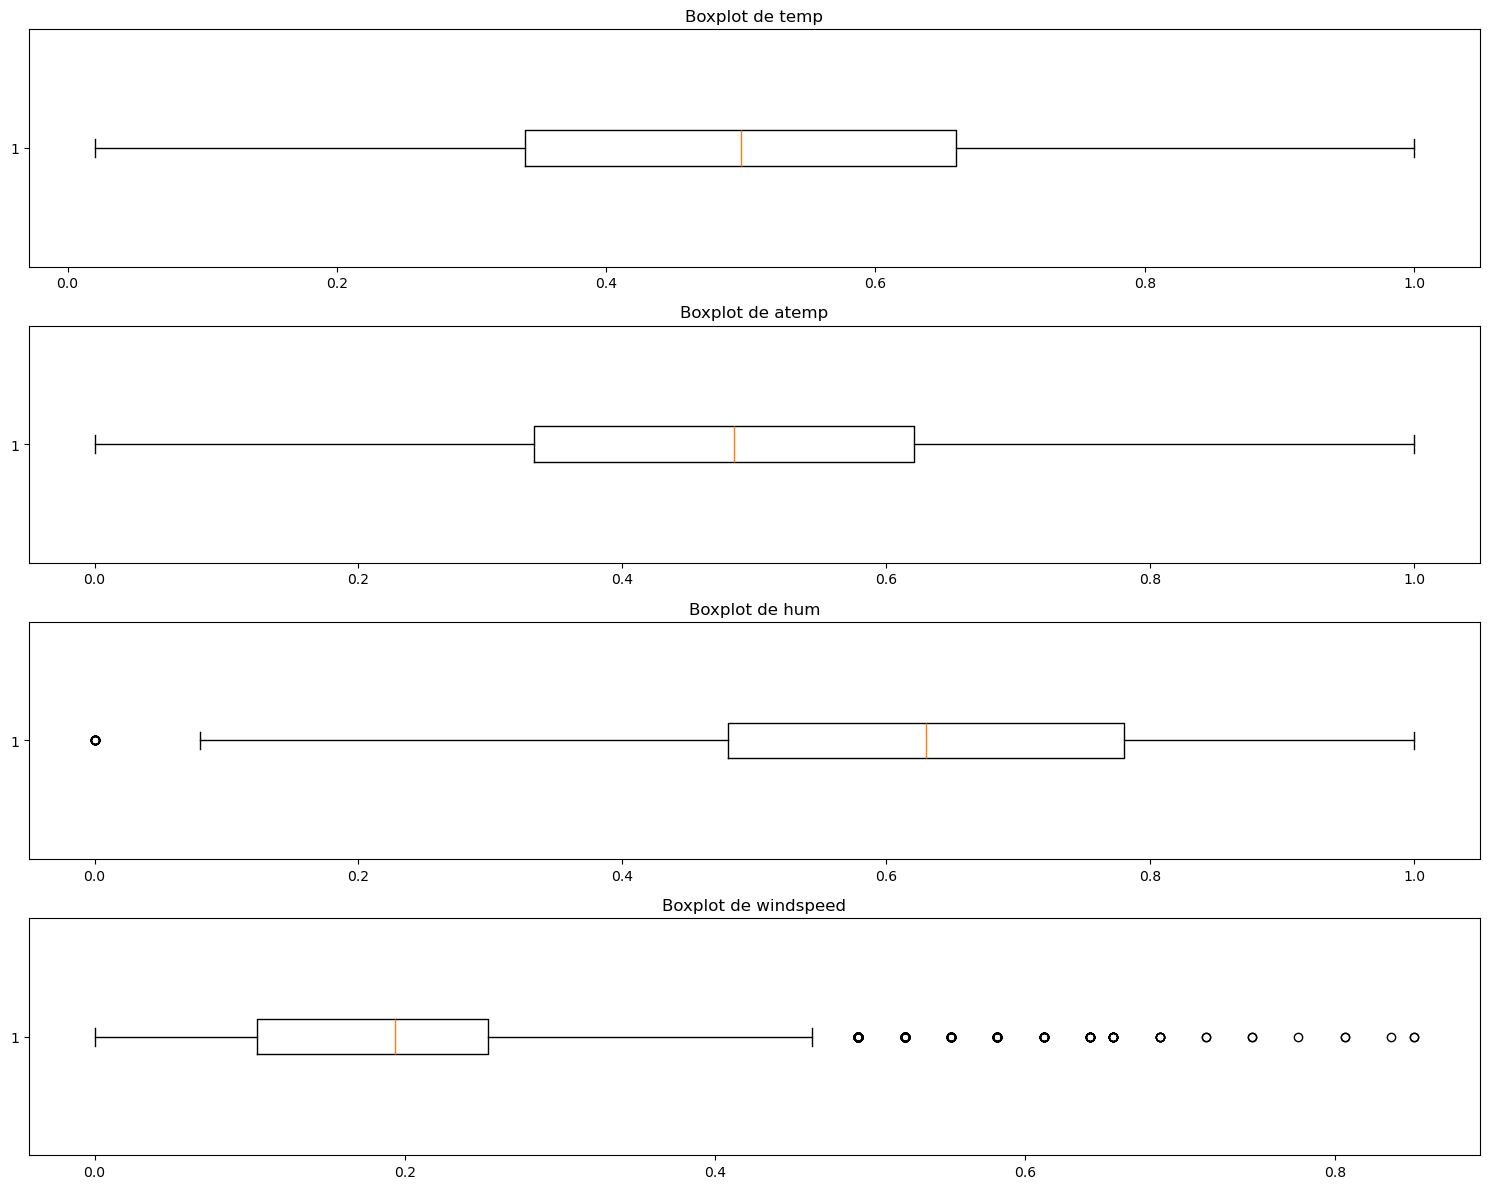

In [16]:
plt.figure(figsize=(15, 3 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

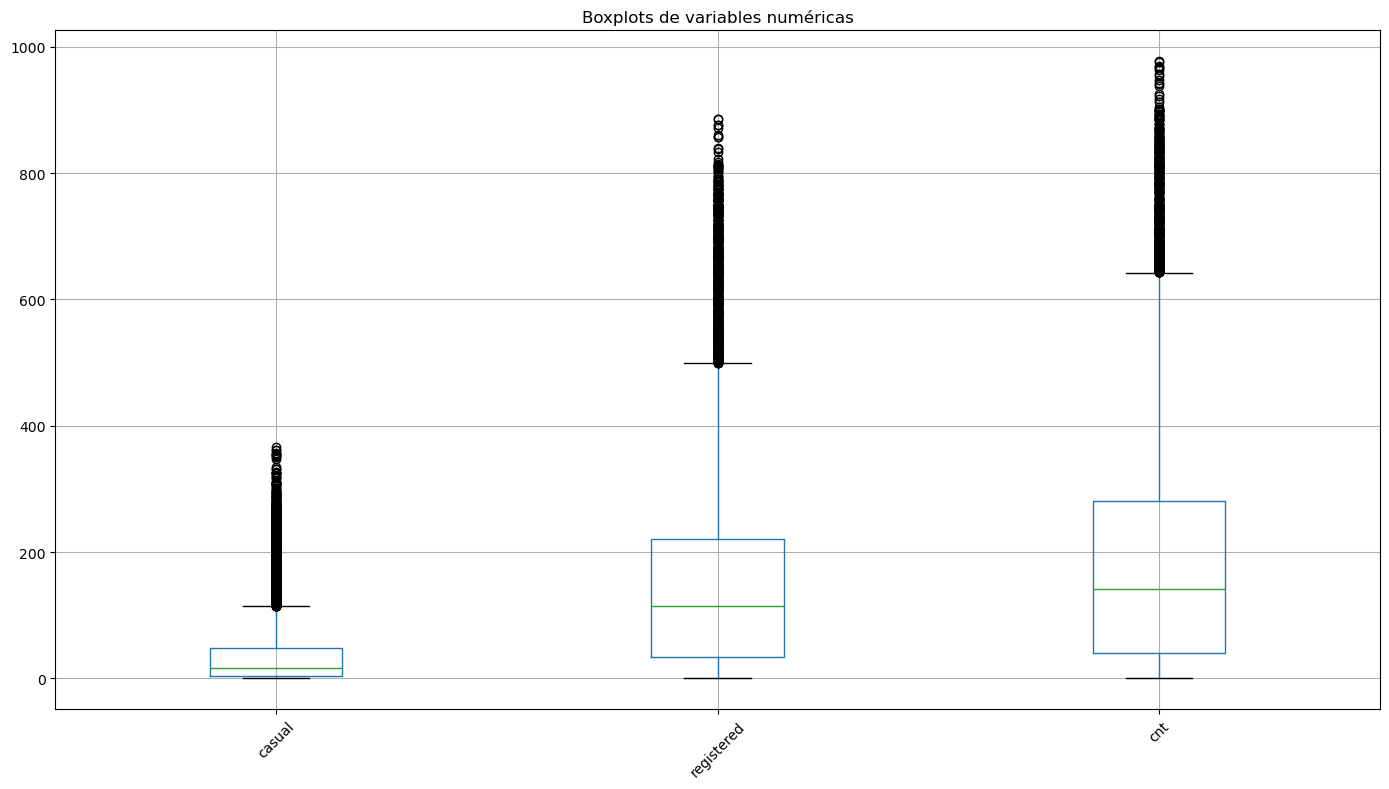

In [17]:
plt.figure(figsize=(14, 8))

# Boxplot para todas las columnas numéricas
df[target_cols].boxplot()

plt.title("Boxplots de variables numéricas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Procedemos a tratar los outliers, igualandolos a los limites inferior y superior del rango intercuartil.

In [18]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

for col in num_cols:
    df[col] = cap_outliers(df[col])

### 2.4.2 Creación de Variables derivadas

Creamos las siguientes variables derivadas:

**Hora Pico**

In [19]:
# Hora pico (7–9 y 17–19)
df["rush_hour"] = df["hr"].isin([7, 8, 9, 17, 18, 19]).astype(int)

**Fin de Semana**

In [20]:
# Fin de semana (en dataset: 0=domingo, 6=sábado)
df["weekend"] = df["weekday"].isin([0, 6]).astype(int)

Agregamos las variables creadas a nuestro listado de variables binarias:

In [21]:
binary_cols.append('rush_hour')
binary_cols.append('weekend')

### 2.4.3 Transformaciones ciclicas

Aplicamos transformaciones ciclicas de seno y coseno a nuestras variables temporales (con excepción del año), teniendo en cuenta su ciclicidad.

In [22]:
df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

df["day_sin"] = np.sin(2 * np.pi * df["day"] / 31)
df["day_cos"] = np.cos(2 * np.pi * df["day"] / 31)

df["mnth_sin"] = np.sin(2 * np.pi * df["mnth"] / 12)
df["mnth_cos"] = np.cos(2 * np.pi * df["mnth"] / 12)

Agrupamos en una lista las nuevas columnas creadas para referencia posterior:

In [23]:
cyclic_cols = [
    'yr',
    'hr_sin', 'hr_cos',
    'weekday_sin', 'weekday_cos',
    'day_sin', 'day_cos',
    'mnth_sin', 'mnth_cos'
]

### 2.4.4 Codificación de variables categóricas

Aplicamos el algoritmo de *one-hot-encoding* a las variables categóricas y escalamos las variables numéricas:

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols + cyclic_cols),
        ("binary", "passthrough", binary_cols),
        ("cat", OneHotEncoder(drop="first"), categoric_cols),
        ("targets", "passthrough", target_cols)
    ]
)

# Pipeline final
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Ajustar y transformar
processed = pipeline.fit_transform(df)

------------------------------------------------------------------------------------------------------------
Finalmente nos queda el siguiente dataset:

In [35]:
# Obtener nombres de columnas del ColumnTransformer
feature_names = []

# 1. Columnas escaladas (continuas + cíclicas)
scale_cols = num_cols + cyclic_cols
feature_names.extend(scale_cols)

# 2. Columnas binarias (pasan directo)
feature_names.extend(binary_cols)

# 3. Columnas categóricas codificadas (OneHotEncoder)
ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_cols = ohe.get_feature_names_out(categoric_cols)
feature_names.extend(ohe_cols)

# 4. Columnas objetivo
feature_names.extend(target_cols)

# Crear DataFrame final
processed_df = pd.DataFrame(processed, columns=feature_names)

print(processed_df.head())
print("\nShape del DataFrame procesado:", processed_df.shape)


       temp     atemp       hum  windspeed        yr    hr_sin    hr_cos  \
0 -1.334648 -1.093281  0.947768  -1.596452 -1.005134  0.006379  1.418362   
1 -1.438516 -1.181732  0.895902  -1.596452 -1.005134  0.372567  1.370193   
2 -1.438516 -1.181732  0.895902  -1.596452 -1.005134  0.713799  1.228971   
3 -1.334648 -1.093281  0.636571  -1.596452 -1.005134  1.006822  1.004318   
4 -1.334648 -1.093281  0.636571  -1.596452 -1.005134  1.231667  0.711546   

   weekday_sin  weekday_cos   day_sin  ...  weekend  season_2  season_3  \
0    -1.101806     0.876391  0.276861  ...      1.0       0.0       0.0   
1    -1.101806     0.876391  0.276861  ...      1.0       0.0       0.0   
2    -1.101806     0.876391  0.276861  ...      1.0       0.0       0.0   
3    -1.101806     0.876391  0.276861  ...      1.0       0.0       0.0   
4    -1.101806     0.876391  0.276861  ...      1.0       0.0       0.0   

   season_4  weathersit_2  weathersit_3  weathersit_4  casual  registered  \
0       0.0    

Comparamos entonces nuestro dataframe original vs el procesado

### 2.4.5 Analisis de transformaciones realizadas

En la siguiente tabla, se describe las ventajas y desventajas de cada una de las transformaciones realizadas:

| **Transformación**                                          | **Ventajas**                                                                                                                                               | **Desventajas**                                                                                                                         |
| ----------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Tratamiento de valores faltantes**                        | • Evita errores en modelos por `NaN`.<br>• Mantiene el tamaño del dataset.<br>• Mediana es robusta ante outliers.                                          | • Puede introducir sesgo si los faltantes no son aleatorios.<br>• Reduce la variabilidad natural de los datos.                          |
| **Tratamiento de outliers (IQR)**                           | • Previene que valores extremos distorsionen el modelo.<br>• Mantiene observaciones sin eliminarlas.<br>• Simple y rápido.                                 | • Puede recortar valores válidos.<br>• No detecta outliers multivariados.<br>• A veces no funciona bien en distribuciones muy sesgadas. |
| **Variables derivadas (rush_hour, weekend)** | • Aporta información adicional útil a los modelos.<br>• Facilita capturar relaciones complejas.<br>• Incorpora conocimiento del dominio.                   | • Si las reglas no son precisas, puede añadir ruido.<br>• Algunos índices dependen de pesos subjetivos.            |
| **Transformaciones cíclicas (sin/cos)**                     | • Representan correctamente periodicidad.<br>• Eliminan saltos artificiales entre valores como 23→0.<br>• Mejoran rendimiento en modelos lineales y redes. | • Aumentan el número de columnas.<br>• Son menos intuitivas e interpretables.<br>• Asumen ciclos perfectamente uniformes.               |
| **Escalado de variables (StandardScaler)**                  | • Mejora el desempeño de modelos sensibles a magnitudes.<br>• Acelera el entrenamiento.<br>• Evita que algunas variables dominen por escala.               | • Pierde interpretabilidad directa (unidades físicas).<br>• Requiere almacenar media y desviación para predicciones nuevas.             |
| **Codificación categórica (OneHotEncoder)**                 | • Permite manejar categorías en modelos numéricos.<br>• Evita relaciones ordinales artificiales.<br>• Robusto para modelos basados en distancias.          | • Aumenta la dimensionalidad del dataset.<br>• Puede fallar si aparecen categorías nuevas no vistas en entrenamiento.                   |


## 2.5 Comparativa dataset original vs transformado

En comparación con nuestro dataset original, ahora se manejarán 22 columns para intentar predecir la variable objetivo count, registered y casual.

In [36]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,rush_hour,weekend,hr_sin,hr_cos,weekday_sin,weekday_cos,day_sin,day_cos,mnth_sin,mnth_cos
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,0,1,0.000000,1.000000,-0.781831,0.62349,2.012985e-01,0.97953,5.000000e-01,0.866025
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,0,1,0.258819,0.965926,-0.781831,0.62349,2.012985e-01,0.97953,5.000000e-01,0.866025
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,0,1,0.500000,0.866025,-0.781831,0.62349,2.012985e-01,0.97953,5.000000e-01,0.866025
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,0,1,0.707107,0.707107,-0.781831,0.62349,2.012985e-01,0.97953,5.000000e-01,0.866025
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,0,1,0.866025,0.500000,-0.781831,0.62349,2.012985e-01,0.97953,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,...,1,0,-0.965926,0.258819,0.781831,0.62349,-2.449294e-16,1.00000,-2.449294e-16,1.000000
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,...,0,0,-0.866025,0.500000,0.781831,0.62349,-2.449294e-16,1.00000,-2.449294e-16,1.000000
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,...,0,0,-0.707107,0.707107,0.781831,0.62349,-2.449294e-16,1.00000,-2.449294e-16,1.000000


In [38]:
processed_df

,temp,atemp,hum,windspeed,yr,hr_sin,hr_cos,weekday_sin,weekday_cos,day_sin,...,weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,casual,registered,cnt
0,-1.334648,-1.093281,0.947768,-1.596452,-1.005134,0.006379,1.418362,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0
1,-1.438516,-1.181732,0.895902,-1.596452,-1.005134,0.372567,1.370193,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,32.0,40.0
2,-1.438516,-1.181732,0.895902,-1.596452,-1.005134,0.713799,1.228971,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,27.0,32.0
3,-1.334648,-1.093281,0.636571,-1.596452,-1.005134,1.006822,1.004318,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,13.0
4,-1.334648,-1.093281,0.636571,-1.596452,-1.005134,1.231667,0.711546,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-1.360252,0.370605,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,108.0,119.0
17375,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-1.218909,0.711546,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,81.0,89.0
17376,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-0.994064,1.004318,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,83.0,90.0
17377,-1.230779,-1.181732,-0.348888,-0.460182,0.994892,-0.701041,1.228971,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,48.0,61.0


Las siguientes variables, entonces, serán nuestras variables regresoras a usar para intentar predecir la cantidad de bicicletas alquiladas:

In [39]:
for column in feature_names:
    print(column)

temp
atemp
hum
windspeed
yr
hr_sin
hr_cos
weekday_sin
weekday_cos
day_sin
day_cos
mnth_sin
mnth_cos
holiday
workingday
rush_hour
weekend
season_2
season_3
season_4
weathersit_2
weathersit_3
weathersit_4
casual
registered
cnt


In [40]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17379 non-null  float64
 1   atemp         17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   yr            17379 non-null  float64
 5   hr_sin        17379 non-null  float64
 6   hr_cos        17379 non-null  float64
 7   weekday_sin   17379 non-null  float64
 8   weekday_cos   17379 non-null  float64
 9   day_sin       17379 non-null  float64
 10  day_cos       17379 non-null  float64
 11  mnth_sin      17379 non-null  float64
 12  mnth_cos      17379 non-null  float64
 13  holiday       17379 non-null  float64
 14  workingday    17379 non-null  float64
 15  rush_hour     17379 non-null  float64
 16  weekend       17379 non-null  float64
 17  season_2      17379 non-null  float64
 18  season_3      17379 non-nu

In [41]:
processed_df.describe()

,temp,atemp,hum,windspeed,yr,hr_sin,hr_cos,weekday_sin,weekday_cos,day_sin,...,weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,casual,registered,cnt
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,1.569989e-16,-1.962486e-16,1.308324e-17,6.541621e-17,1.046659e-16,-3.924973e-17,2.821074e-17,7.195784e-17,8.381452e-17,-4.906216e-17,...,0.288509,0.253697,0.258703,0.243512,0.261465,0.081650,0.000173,35.676218,153.786869,189.463088
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,...,0.453082,0.435139,0.437935,0.429214,0.439445,0.273839,0.013138,49.305030,151.357286,181.387599
min,-2.477205e+00,-2.768625e+00,-3.097797e+00,-1.596452e+00,-1.005134e+00,-1.408462e+00,-1.408902e+00,-1.375081e+00,-1.278032e+00,-1.404812e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-8.153035e-01,-8.290895e-01,-7.638173e-01,-7.123108e-01,-1.005134e+00,-9.940645e-01,-9.948588e-01,-1.101806e+00,-1.278032e+00,-1.020941e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,34.000000,40.000000
50%,1.564696e-02,5.251758e-02,1.417599e-02,4.492055e-02,9.948919e-01,6.378975e-03,4.729852e-03,4.658976e-03,-3.192234e-01,-5.233628e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,115.000000,142.000000
75%,8.465975e-01,8.462549e-01,7.921693e-01,5.500235e-01,9.948919e-01,1.006822e+00,1.004318e+00,1.111124e+00,8.763912e-01,1.010474e+00,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,48.000000,220.000000,281.000000
max,2.612367e+00,3.050563e+00,1.933226e+00,2.443525e+00,9.948919e-01,1.421220e+00,1.418362e+00,1.384399e+00,1.408490e+00,1.394345e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


Finalmente, convertimos nuestro DataFrame modificado a un csv, para poder exportarlo en futuras referencias

In [42]:
processed_df.to_csv('../Data/hour-Processed.csv')